In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [47]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\GAJAWADAYASHWANTH\.cache\kagglehub\datasets\harishkumardatalab\housing-price-prediction\versions\1


In [48]:
csv_path = os.path.join(path, 'Housing.csv')
df = pd.read_csv(csv_path)

print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [50]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [51]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [52]:
df.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [53]:
binary_cols=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[binary_cols]=df[binary_cols].replace({'yes':1,'no':0})
                                         

In [54]:
df['furnishingstatus'] = df['furnishingstatus'].replace(
    '', 
    'unfurnished'  # or your preferred default
)

In [55]:
df=pd.get_dummies(df,columns=['furnishingstatus'],drop_first=False)

In [64]:
binary_cols1=['furnishingstatus_furnished','furnishingstatus_semi-furnished','furnishingstatus_unfurnished']
df[binary_cols1]=df[binary_cols1].astype(int)

In [68]:
print(df.head())


      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                           1                                0   
1                         

C:\Users\GAJAWADAYASHWANTH\anaconda3\anaconda\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GAJAWADAYASHWANTH\anaconda3\anaconda\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GAJAWADAYASHWANTH\anaconda3\anaconda\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GAJAWADAYASHWANTH\anaconda3\anaconda\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: Futur

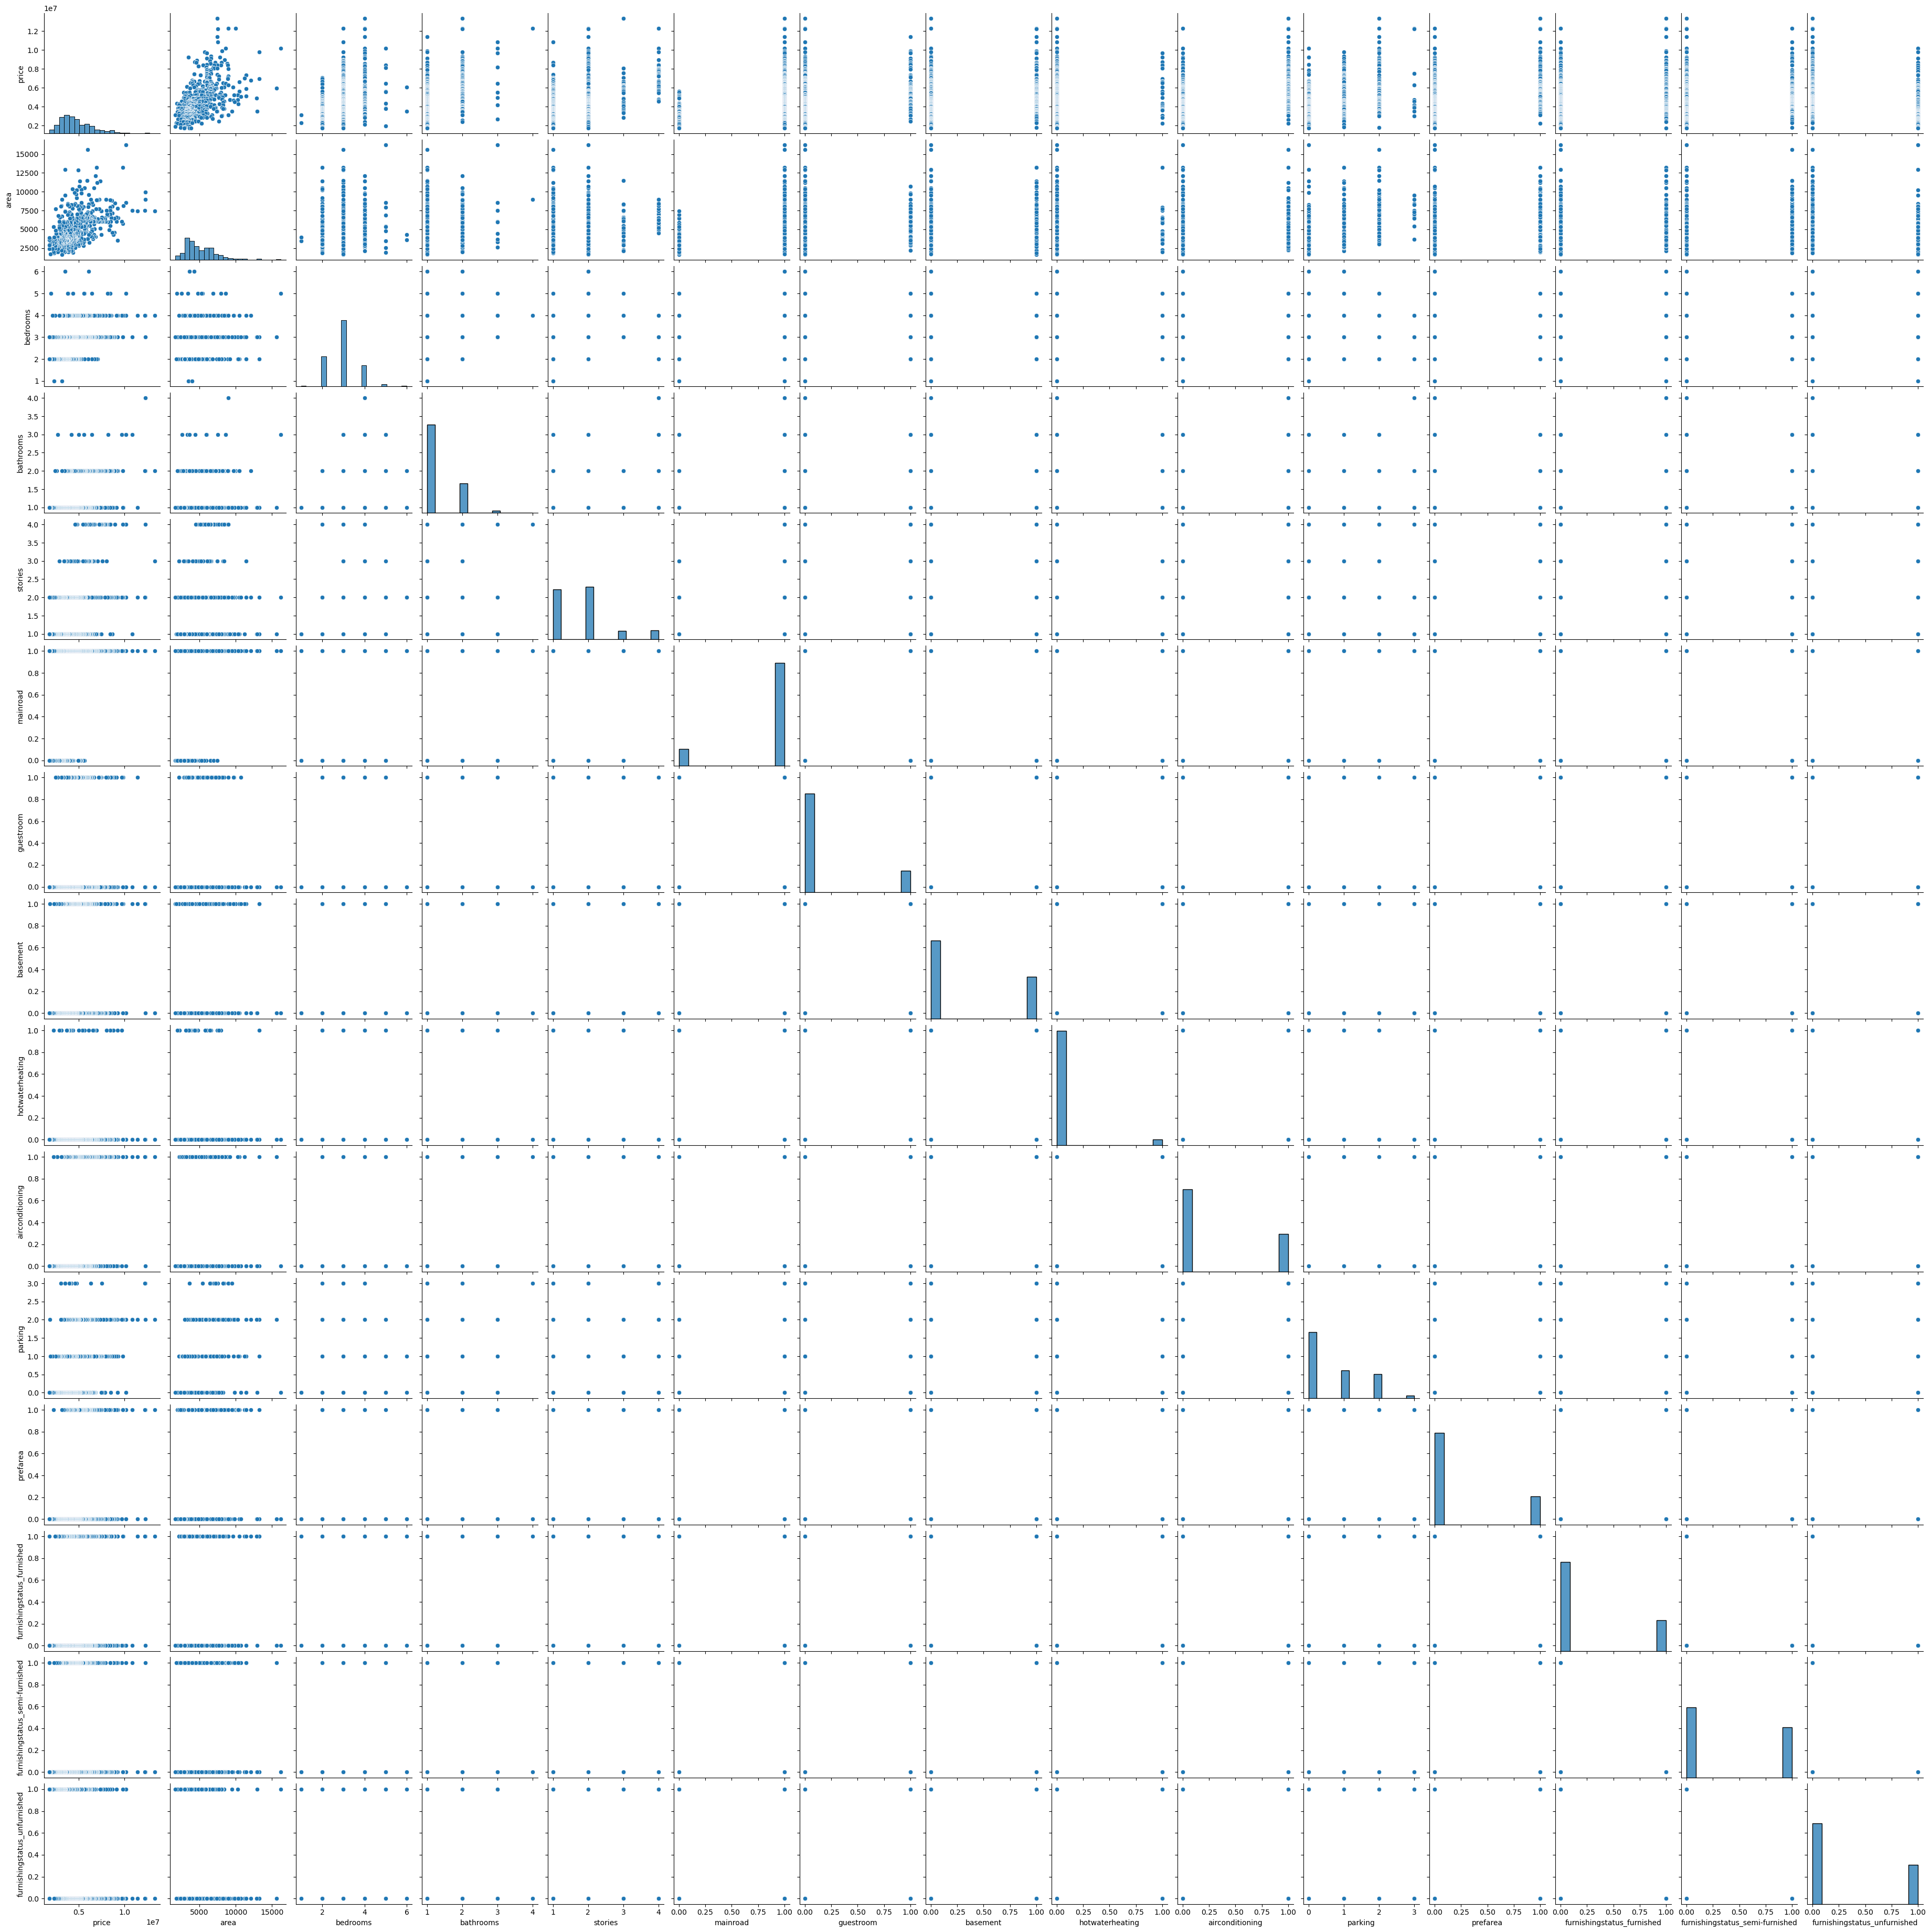

In [59]:
sns.pairplot(df)

In [69]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='price')
y=df['price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [71]:
y_pred=model.predict(X_test)

In [73]:
#Model Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)


print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R²):', r2)


Mean Absolute Error (MAE): 970043.4039201637
Mean Squared Error (MSE): 1754318687330.6633
R-squared (R²): 0.6529242642153185


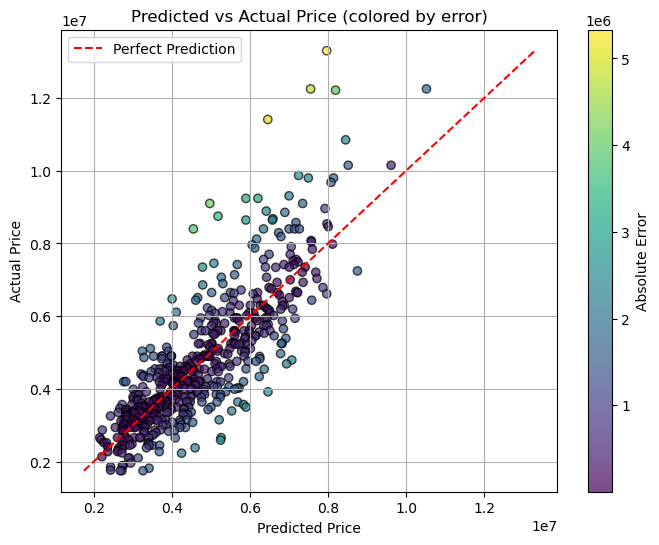

In [78]:
#------------for multiple features----------

errors = np.abs(y_true - y_pred)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(y_pred, y_true, c=errors, cmap='viridis', alpha=0.7, edgecolor='k')
plt.plot(lims, lims, 'r--', label='Perfect Prediction')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Predicted vs Actual Price (colored by error)')
plt.colorbar(scatter, label='Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: 79856.73100296874
Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  3.67919948e+05  2.31610037e+05  3.90251176e+05  6.84649885e+05
  7.91426736e+05  2.24841913e+05  6.29890565e+05  1.80175627e+05
  5.32938090e+04 -2.33469436e+05]
